# San Ramon Rents Using Linear Model

In this tutorial we'll walk through how to predict San Ramon rents using *linear regression* with a linear model.

The rents data is based on <https://sfbay.craigslist.com>


## San Ramon, California

<img height=500 src="https://cdn.tollbrothers.com/communities/12871/images/2880BiancoExterior_920.jpg">

## Prerequisites

To complete this tutorial, we need:  

- jupyter
- scikitlearn
- pandas
- numpy
- matplotlib
- seaborn

## Imports

To begin, the following code imports the necessary packages we'll need for this exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import logging

In [2]:
logging.getLogger().setLevel(logging.DEBUG)

np.random.seed(1234)

## Reading Rent Data

We are going to read the CSV data into a data frame.

In [3]:
# Get the rents as a data frame.
rents_csv = "/Users/asimjali/g/projects/aws-sage/san-ramon-rents.csv"
df = pd.read_csv(rents_csv)

In [4]:
# Lets take a look at the data.
df.describe()

,rent,br,ft2
count,256.000000,256.000000,256.000000
mean,2787.437500,2.175781,1179.835938
std,878.821057,0.943689,642.734242
min,1800.000000,1.000000,400.000000
25%,2300.000000,2.000000,800.000000
50%,2575.000000,2.000000,953.000000
75%,2961.250000,3.000000,1253.500000
max,9500.000000,5.000000,5200.000000


## Visualize

The first thing to do when you get a new data set is to visualize it and develop some intuition about it.

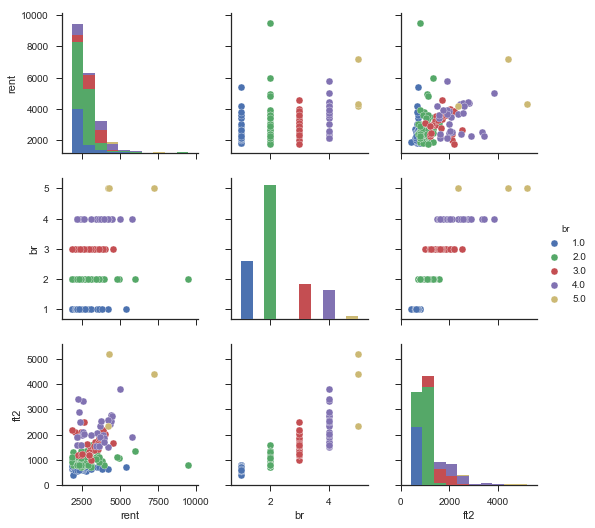

In [5]:
# Create a scatter matrix to figure out relationships between features and label.
sns.set(style="ticks")
sns.pairplot(df,hue='br')
plt.show()

## Preparation

Before we build and model and test it, we need to set things up. We want to split our data into a training set and a test set. This way we can evaluate our model objectively.

In [7]:
# Split the data into features (X) and label (y)
label_column = 'rent'
X = df.drop(label_column, axis=1)
y = df[label_column]

In [9]:
y

0      2350.0
1      1981.0
2      2155.0
3      2125.0
4      1989.0
5      2220.0
6      2649.0
7      2258.0
8      2535.0
9      3200.0
10     3500.0
11     3849.0
12     3350.0
13     2180.0
14     3000.0
15     1980.0
16     2450.0
17     1990.0
18     3000.0
19     3650.0
20     2631.0
21     2696.0
22     2646.0
23     2721.0
24     2696.0
25     2696.0
26     2500.0
27     2636.0
28     2616.0
29     2575.0
        ...  
226    2320.0
227    2425.0
228    3600.0
229    3395.0
230    2400.0
231    2650.0
232    2650.0
233    2320.0
234    2520.0
235    4295.0
236    9500.0
237    2350.0
238    2160.0
239    3050.0
240    4200.0
241    2155.0
242    1900.0
243    2900.0
244    2300.0
245    2320.0
246    1800.0
247    2675.0
248    2270.0
249    2425.0
250    2400.0
251    2585.0
252    3800.0
253    2155.0
254    2300.0
255    2300.0
Name: rent, Length: 256, dtype: float64

In [10]:
# Split data set into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Since ft2 is much larger than br we can scale to standardize the features.
scale_features = False
if scale_features:
    # Scale features automatically extracts feature numpy arrays.
    from sklearn import preprocessing
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train = std_scale.transform(X_train)
    X_test = std_scale.transform(X_test)
else:
    # Extract feature numpy arrays.
    X_train = X_train.values
    X_test = X_test.values

# Extract label numpy arrays.
y_train = y_train.values
y_test = y_test.values

## Training the model

Next we will define our model and then fit it to the training data set.

In [11]:
# Use linear model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

/Users/asimjali/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluating the Model

Once we have a trained model, we should evaluate it on the data we set aside earlier. Once we have evaluated it we can start using it for inference.

Lets see how we did.

In [14]:
# Lets find out how we did.
y_predict = model.predict(X_test)

RMSE = 683.495126007
MAPE = 8.87%
Accuracy = 91.13%


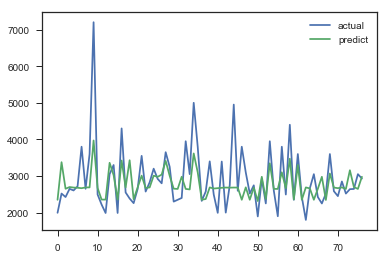

In [16]:
# RMSE is Root Mean Square Error.
rmse = np.sqrt(np.mean((y_predict - y_test)**2))
print('RMSE = {}'.format(rmse))

# MAPE is Median Absolute Percentage Error.
mape = 100 * np.median(np.abs(y_test - y_predict) / y_test)
print('MAPE = {}%'.format(round(mape, 2)))

# Accuracy is the opposite of MAPE.
accuracy = 100 - mape
print('Accuracy = {}%'.format(round(accuracy, 2)))

# Plot the predictions against the actual values.
plt.plot(np.array(y_test), label='actual')
plt.plot(y_predict, label='predict')
plt.legend()
plt.show()

## Conclusion

The model is surprisingly robust despite its simplicity.